# Assignment 4: Movie Review Analysis [50 Pt]

In this assignment, we will build a recurrent neural network to work with sequential text data, specificially, movie review data to identify the reviewer sentiment. In the process of completing this assignment, you will:
    
1. Clean and process text data for machine learning.
2. Perform tokenization of text data.
3. Understand and implement a word-level recurrent neural network.
4. Implement batching of text data using a DataLoader before training a recurrent neural network.
5. Understand how to apply pretrained models for transfer learning in natural language processing projects.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

## Colab Link

Include a link to your Colab file here. If you would like the TA to look at your Colab file in case your solutions are cut off, **please make sure that your Colab file is publicly accessible at the time of submission.**

In [1]:
# TO BE COMPLETED

#http://https://colab.research.google.com/drive/1EMsQAc9jeIXjZk62y5yMUwDAE-QiaIjL

# PART A - Sentiment Analysis

In this part we will construct a world-level LSTM model for identifying positive and negative reviews. This will be done in a similar way to what was shared in the preparation code for Assignment 4.

In [2]:
# load standard modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# load special modules/libraries
import os
import warnings
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from collections import Counter
import string
import re
from tqdm  import tqdm

# load pytorch modules/libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/seonghak/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Part 1. Data Cleaning [5 pt]

We will be using the "IMDB Movie Review Dataset" provided on the course website. Download "IMDB Dataset.csv" into your Colab workspace.

### Part (i) [1pt EXPLORATORY]

Open up the file in Python, and examine some examples of positive and negative reviews. Comment on the quality of the data and any challenges you foresee in working with these data. Pick one example of a positive review and one of a negative review to support your comments.

In [3]:
# download IMDB review data

# load dataset
df = pd.read_csv("IMDB Dataset.csv")

# process into data and labels
X = df['review'].values
y = df['sentiment'].values


In [4]:
print(X.shape), print(y.shape)

(50000,)
(50000,)


(None, None)

In [5]:
# TO BE COMPLETED
print(f'review : \n{X[18]}, \nsentiment : {y[18]}')


review : 
I remember this film,it was the first film i had watched at the cinema the picture was dark in places i was very nervous it was back in 74/75 my Dad took me my brother & sister to Newbury cinema in Newbury Berkshire England. I recall the tigers and the lots of snow in the film also the appearance of Grizzly Adams actor Dan Haggery i think one of the tigers gets shot and dies. If anyone knows where to find this on DVD etc please let me know.The cinema now has been turned in a fitness club which is a very big shame as the nearest cinema now is 20 miles away, would love to hear from others who have seen this film or any other like it., 
sentiment : positive


In [6]:
'''
PROVIDE YOUR ANSWER BELOW

Index 18 says that the movie itself is not bad, but the movie before it was remade was better.
This means giving a negative evaluation of the film in question and a positive evaluation of the previous film.
In this way, we can see that the movie has not been properly evaluated.


'''


'\nPROVIDE YOUR ANSWER BELOW\n\nIndex 18 says that the movie itself is not bad, but the movie before it was remade was better.\nThis means giving a negative evaluation of the film in question and a positive evaluation of the previous film.\nIn this way, we can see that the movie has not been properly evaluated.\n\n\n'

### Part (ii) [1pt EXPLORATORY]

Perform summary statistics on the dataset. What is the average character length of a review? What are the lengths of the longest and shortest reviews?

How many positive reviews and negative reviews are there. Generate a histogram to compare the average character length for positive and negative reviews. Comment on the differences in positive and negative reviews and how that may affect the model you will be using later.

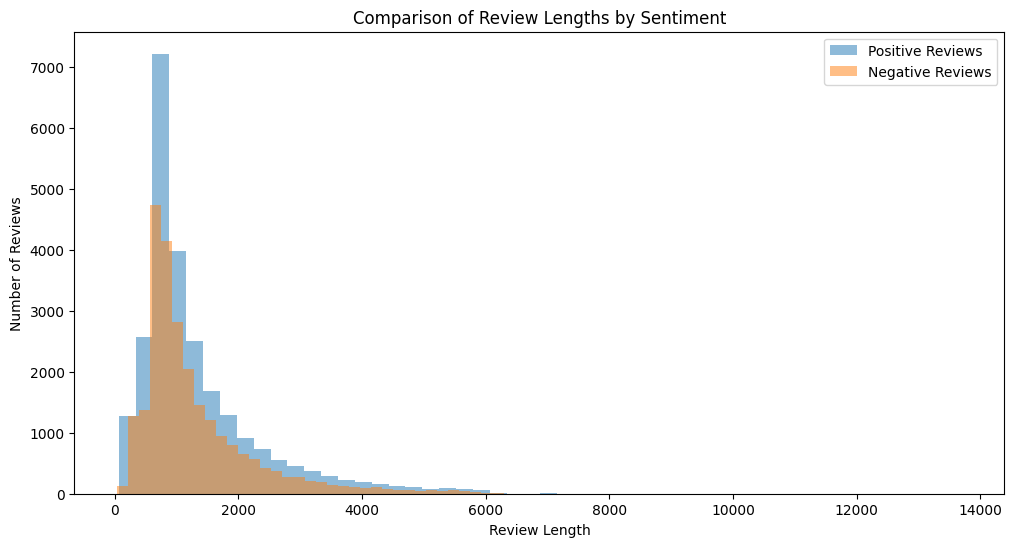

average length : 1309.43102
longest review : 13704
shortest review : 32
the number of positive reviews : 25000
the number of negative reviews : 25000
average length positive : 1324.79768
average length negative : 1294.06436


In [7]:
review_lengths = np.array([len(review) for review in X])

average_length = np.mean(review_lengths)

longest_review = np.max(review_lengths)
shortest_review = np.min(review_lengths)

num_positive_reviews = (y == 'positive').sum()
num_negative_reviews = (y == 'negative').sum()

positive_review_lengths = review_lengths[y == 'positive']
negative_review_lengths = review_lengths[y == 'negative']

avg_length_positive = np.mean(positive_review_lengths)
avg_length_negative = np.mean(negative_review_lengths)

plt.figure(figsize=(12, 6))
plt.hist(positive_review_lengths, alpha=0.5, bins=50, label='Positive Reviews')
plt.hist(negative_review_lengths, alpha=0.5, bins=50, label='Negative Reviews')
plt.legend()
plt.title('Comparison of Review Lengths by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

average_length, longest_review, shortest_review, num_positive_reviews, num_negative_reviews, avg_length_positive, avg_length_negative
print(f'average length : {average_length}')
print(f'longest review : {longest_review}')
print(f'shortest review : {shortest_review}')
print(f'the number of positive reviews : {num_positive_reviews}')
print(f'the number of negative reviews : {num_negative_reviews}')
print(f'average length positive : {avg_length_positive}')
print(f'average length negative : {avg_length_negative}')



In [9]:
'''
PROVIDE YOUR ANSWER BELOW

General observations :

average length : 1309.43102
longest review : 13704
shortest review : 32
the number of positive reviews : 25000
the number of negative reviews : 25000
average length positive : 1324.79768
average length negative : 1294.06436

Observations positive vs negative:

There is a balance of positive and negative reviews.
We can see that not only the amount of data is the same at 25000, but the avg length is also similar.

'''


'\nPROVIDE YOUR ANSWER BELOW\n\nGeneral observations :\n\naverage length : 1309.43102\nlongest review : 13704\nshortest review : 32\nthe number of positive reviews : 25000\nthe number of negative reviews : 25000\naverage length positive : 1324.79768\naverage length negative : 1294.06436\n\nObservations positive vs negative:\n\nThere is a balance of positive and negative reviews. \nWe can see that not only the amount of data is the same at 25000, but the avg length is also similar.\n\n'

### Part (iii) [1pt EXPLORATORY]

The following helper code will be used to process the data before we can train our LSTM model. In point form comment on what processing steps are performed in the code provided below and why these steps are necessary or beneficial to training and LSTM.

In [10]:
X[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [9]:
def preprocess_string(str1):
    # remove all non-word characters excluding number and letters
    str1= re.sub(r"[^\w\s]",'',str1)
    # remove all whitespace with no space
    str1= re.sub(r"\s",'',str1)
    # replace digits with no space
    str1= re.sub(r"\d",'',str1)
    return str1

def preprocess_sentence(sen1):
    word_list=[]
    stop_word = set(stopwords.words("english"))
    for word in sen1.lower().split():
        word = preprocess_string(word)
        if word not in stop_word and word!='':
            word_list.append(word)
    return word_list

def get_stoi(data):
    word_list=[]
    for review in data:
        word_list.extend(preprocess_sentence(review))
    corpus = Counter(word_list)
    print(corpus.get)
    # sorting on the basis of most common words
    corpus_ =sorted(corpus,key= corpus.get,reverse=True)[:1000]
    # creating a dict
    stoi =  {ch:i+1 for i,ch in enumerate(corpus_)}
    return stoi

def tokenize(data, labels, stoi):
    # tokenize
    data_encoded = []
    for review in data:
        data_encoded.append([stoi[word] for word in preprocess_sentence(review)
                                     if word in stoi.keys()])

    labels_encoded = [1 if label =='positive' else 0 for label in labels]

    return data_encoded, np.array(labels_encoded)

def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review)!=0:
            features[ii, -len(review):] = np.array(review)[:seq_len]

    return features

Certainly, let's connect each step of the preprocessing directly with the provided helper code:

1. **Clean Text (`preprocess_string`)**:
   - Removes punctuation and special characters to focus on words and numbers, simplifying the text.
   - Removes all spaces (though typically, you'd want to clean whitespace, not remove it entirely).
   - Removes digits to focus on textual information, though this might not always be desired depending on context.

2. **Remove Stopwords and Tokenization (`preprocess_sentence`)**:
   - Converts text to lowercase and splits into words, making the processing uniform and simplifying the text.
   - Removes stopwords to focus on more semantically meaningful words.
   - Applies `preprocess_string` to each word for further cleaning.

3. **Build Vocabulary (`get_stoi`)**:
   - Creates a list of unique words from the processed text.
   - Limits the vocabulary to the 1000 most common words, reducing model complexity and focusing on relevant words.
   - Maps each of these words to a unique integer, facilitating numerical processing by the LSTM.

4. **Encode Reviews and Labels (`tokenize`)**:
   - Converts reviews into sequences of integers using the vocabulary mapping created earlier. This step transforms the text into a format that the LSTM can process.
   - Encodes sentiment labels as binary values, aligning with the binary classification task (positive to 1, negative to 0).

5. **Padding (`padding_`)**:
   - Ensures all sequences have the same length by padding them with zeros. This uniform length is crucial for training LSTMs, as they require fixed-size input tensors.

These preprocessing steps, as defined in the helper code, are essential for preparing the text data for LSTM model training. They systematically reduce the complexity of the raw text, focus the model's learning on the most informative parts of the data, and transform the data into a numerical format that the LSTM can efficiently process.

### Part (iv) [1pt EXPLORATORY]

Split the dataset into `train`, `valid`, and `test`. Use a 60-20-20 split. Then apply the above processing steps to prepare your data for training.

Set the padding of the reviews to 500.

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

stoi = get_stoi(X_train)
X_train_encoded, y_train_encoded = tokenize(X_train, y_train, stoi)
X_valid_encoded, y_valid_encoded = tokenize(X_valid, y_valid, stoi)
X_test_encoded, y_test_encoded = tokenize(X_test, y_test, stoi)

seq_len = 500
X_train_padded = padding_(X_train_encoded,seq_len)
X_valid_padded = padding_(X_valid_encoded,seq_len)
X_test_padded = padding_(X_test_encoded,seq_len)


<built-in method get of Counter object at 0x7ff36874e540>


### Part (v) [1pt EXPLORATORY]

Create a DataLoader that will allow you to load the training and validation data in mini-batches. Then generate a dataset of batch size of 16 to verify that the DataLoader works as intended.

In [11]:
class ReviewDataset():
    """Custom Dataset for loading the review text data"""
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        return text, label


# Convert the padded training and validation datasets and their labels into PyTorch tensors
train_texts_tensor = torch.tensor(X_train_padded, dtype=torch.long)
train_labels_tensor = torch.tensor(y_train_encoded, dtype=torch.float)
valid_texts_tensor = torch.tensor(X_valid_padded, dtype=torch.long)
valid_labels_tensor = torch.tensor(y_valid_encoded, dtype=torch.float)


# Create instances of the ReviewDataset
train_dataset = ReviewDataset(train_texts_tensor, train_labels_tensor)
valid_dataset = ReviewDataset(valid_texts_tensor, valid_labels_tensor)


batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)

for texts, labels in train_loader:
    print(f'train loader      -- Batch size: {texts.size()}, Labels size: {labels.size()}')
    break  # Only iterate through the first batch for this example

for texts, labels in valid_loader:
    print(f'validation loader -- Batch size: {texts.size()}, Labels size: {labels.size()}')
    break  # Only iterate through the first batch for this example


train loader      -- Batch size: torch.Size([16, 500]), Labels size: torch.Size([16])
validation loader -- Batch size: torch.Size([16, 500]), Labels size: torch.Size([16])


## Part 2. Model Building [2pt MODEL]

Build a recurrent neural network model, using an architecture of your choosing. Use one or more fully-connected layers to make the prediction based on your recurrent network output.

Instead of using the RNN output value for the final token, another often used strategy is to max-pool over the entire output array. That is, instead of calling something like:

```
out, _ = self.rnn(x)
self.fc(out[:, -1, :])
```

where `self.rnn` is an `nn.RNN`, `nn.GRU`, or `nn.LSTM` module, and `self.fc` is a
fully-connected
layer, we use:

```
out, _ = self.rnn(x)
self.fc(torch.max(out, dim=1)[0])
```

This works reasonably in practice. An even better alternative is to concatenate the max-pooling and average-pooling of the RNN outputs:

```
out, _ = self.rnn(x)
out = torch.cat([torch.max(out, dim=1)[0],
                 torch.mean(out, dim=1)], dim=1)
self.fc(out)
```

We encourage you to try out all these options. The way you pool the RNN outputs is one of the "hyperparameters" that you can choose to tune later on.

In [12]:
class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
      super(SentimentRNN, self).__init__()
      self.n_layers = n_layers
      self.hidden_dim = hidden_dim
      self.embedding = nn.Embedding(vocab_size, embedding_dim)
      self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
      self.dropout = nn.Dropout(drop_prob)
      self.fc = nn.Linear(2*hidden_dim, output_dim)
      self.sig = nn.Sigmoid()

    def forward(self, x, hidden):
      batch_size = x.size(0)

      # Embedding and RNN
      x = self.embedding(x)
      out, hidden = self.lstm(x, hidden)

      # Max pooling and average pooling
      out_max = torch.max(out, dim=1)[0]
      out_avg = torch.mean(out, dim=1)
      out = torch.cat([out_max, out_avg], dim=1)

      # Dropout and fully connected layer
      out = self.dropout(out)
      out = self.fc(out)

      # Sigmoid function
      sig_out = self.sig(out)

      return sig_out, hidden


    def init_hidden(self, batch_size):

      weight = next(self.parameters()).data
      if torch.cuda.is_available():
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                    weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
      else:
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                    weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

      return hidden


## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

In [13]:
def get_accuracy(model, data_loader):

    model.eval()

    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in data_loader:
          if torch.cuda.is_available():
            inputs, labels = inputs.to(device), labels.to(device)

          outputs, _ = model(inputs, model.init_hidden(inputs.size(0)))
          predicted = outputs.round()

          # Update totals
          total += labels.size(0)
          correct += (predicted == labels.unsqueeze(1)).sum().item()

    return correct / total



### Part (ii) [1pt MODEL]

Train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

In [16]:
import torch.optim as optim

def train(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-5, device='cpu'):

  criterion = nn.BCELoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  # To store metrics
  train_losses, val_losses = [], []
  train_accuracies, val_accuracies = [], []


  for epoch in range(num_epochs):
      # Training
      model.train()
      train_loss = 0.0
      for index, batch in enumerate(train_loader):
          inputs, labels = batch[0].to(device), batch[1].to(device)
          hidden = model.init_hidden(inputs.size(0))
          if torch.cuda.is_available():
            hidden = tuple([each.data.cuda() for each in hidden])

          optimizer.zero_grad()
          output, hidden = model(inputs, hidden)
          loss = criterion(output.squeeze(), labels.float())
          loss.backward()
          optimizer.step()
          train_loss += loss.item()

      # Validation
      val_loss = 0.0
      val_accuracy = get_accuracy(model, valid_loader)

      model.eval()
      with torch.no_grad():
          for batch in valid_loader:
            inputs, labels = batch[0].to(device), batch[1].to(device)
            hidden = model.init_hidden(inputs.size(0))
            if torch.cuda.is_available():
              hidden = tuple([each.data.cuda() for each in hidden])
            output, _ = model(inputs, hidden)
            loss = criterion(output.squeeze(), labels.float())
            val_loss += loss.item()

      # Calculate average losses
      train_losses.append(train_loss / len(train_loader))
      val_losses.append(val_loss / len(valid_loader))

      # Store accuracy
      train_accuracies.append(get_accuracy(model, train_loader))
      val_accuracies.append(val_accuracy)

      print(f'Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, '
            f'Valid Loss: {val_losses[-1]:.4f}, Valid Acc: {val_accuracies[-1]:.4f}')

  # Plotting
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(train_losses, label='Training Loss')
  plt.plot(val_losses, label='Validation Loss')
  plt.title('Training & Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(train_accuracies, label='Training Accuracy')
  plt.plot(val_accuracies, label='Validation Accuracy')

  plt.show()


Epoch 1: Train Loss: 0.6934, Train Acc: 0.5648, Valid Loss: 0.6920, Valid Acc: 0.5682
Epoch 2: Train Loss: 0.6913, Train Acc: 0.6406, Valid Loss: 0.6886, Valid Acc: 0.6422
Epoch 3: Train Loss: 0.6530, Train Acc: 0.6912, Valid Loss: 0.5989, Valid Acc: 0.6870
Epoch 4: Train Loss: 0.5757, Train Acc: 0.7241, Valid Loss: 0.5566, Valid Acc: 0.7147
Epoch 5: Train Loss: 0.5387, Train Acc: 0.7431, Valid Loss: 0.5311, Valid Acc: 0.7349


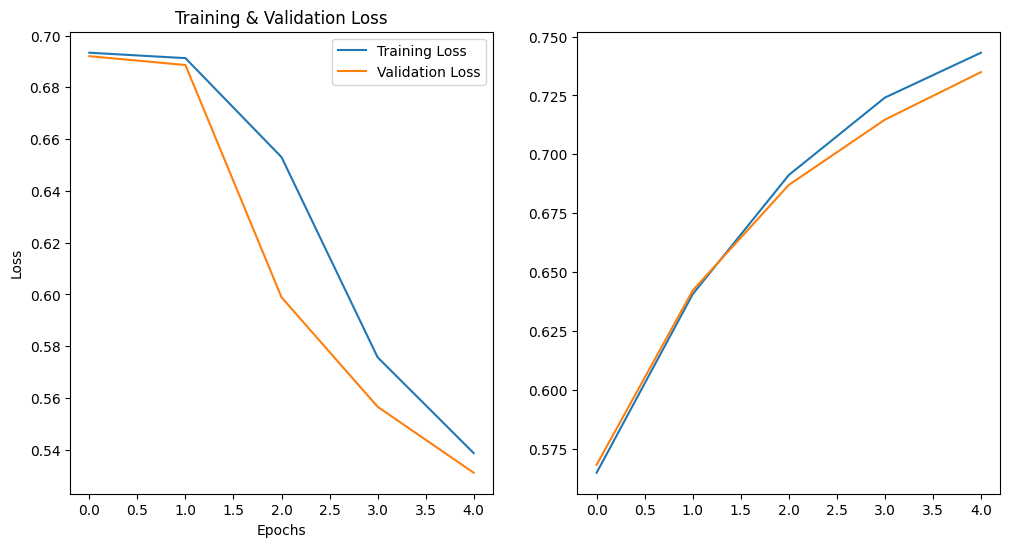

In [17]:
# Parameters for the model
vocab_size = len(stoi) + 1
embedding_dim = 128
hidden_dim = 256
output_dim = 1
n_layers = 2
device = "cuda" if torch.cuda.is_available() else "cpu"

model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)
train(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-5, device=device)

### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters.
You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

Epoch 1: Train Loss: 0.6933, Train Acc: 0.5680, Valid Loss: 0.6921, Valid Acc: 0.5647
Epoch 2: Train Loss: 0.6918, Train Acc: 0.5402, Valid Loss: 0.6900, Valid Acc: 0.5389
Epoch 3: Train Loss: 0.6802, Train Acc: 0.6664, Valid Loss: 0.6280, Valid Acc: 0.6720
Epoch 4: Train Loss: 0.5745, Train Acc: 0.7304, Valid Loss: 0.5447, Valid Acc: 0.7303
Epoch 5: Train Loss: 0.5308, Train Acc: 0.7501, Valid Loss: 0.5195, Valid Acc: 0.7480
Epoch 6: Train Loss: 0.5091, Train Acc: 0.7600, Valid Loss: 0.5057, Valid Acc: 0.7558
Epoch 7: Train Loss: 0.4902, Train Acc: 0.7763, Valid Loss: 0.4879, Valid Acc: 0.7693
Epoch 8: Train Loss: 0.4720, Train Acc: 0.7880, Valid Loss: 0.4731, Valid Acc: 0.7833
Epoch 9: Train Loss: 0.4558, Train Acc: 0.7980, Valid Loss: 0.4603, Valid Acc: 0.7873
Epoch 10: Train Loss: 0.4406, Train Acc: 0.8072, Valid Loss: 0.4487, Valid Acc: 0.7974


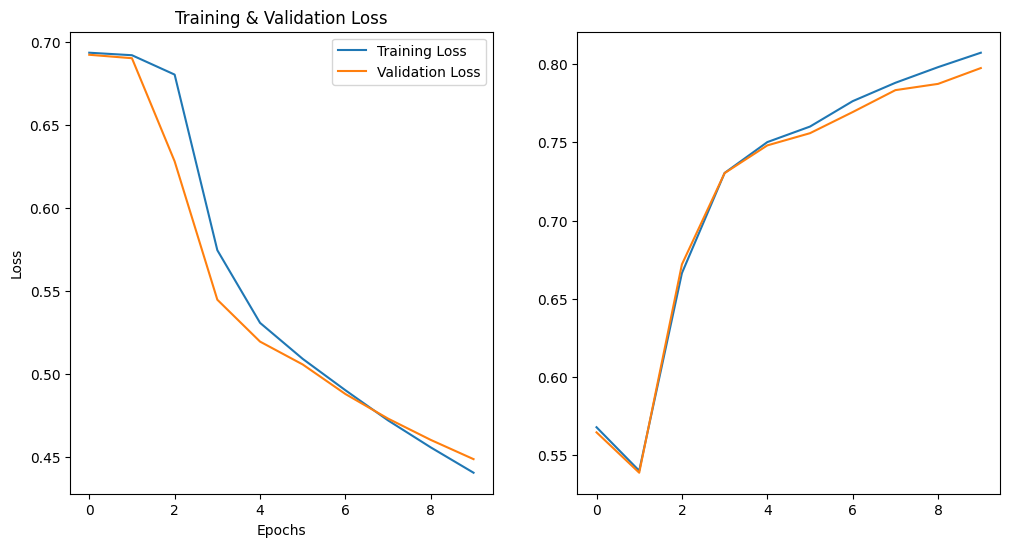

In [15]:
# num_epochs=10
model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)
train(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-5, device=device)

Epoch 1: Train Loss: 0.6936, Train Acc: 0.5004, Valid Loss: 0.6926, Valid Acc: 0.5010
Epoch 2: Train Loss: 0.6921, Train Acc: 0.6159, Valid Loss: 0.6899, Valid Acc: 0.6087
Epoch 3: Train Loss: 0.6797, Train Acc: 0.6759, Valid Loss: 0.6338, Valid Acc: 0.6689
Epoch 4: Train Loss: 0.5584, Train Acc: 0.7634, Valid Loss: 0.5134, Valid Acc: 0.7571
Epoch 5: Train Loss: 0.4906, Train Acc: 0.7893, Valid Loss: 0.4746, Valid Acc: 0.7825
Epoch 6: Train Loss: 0.4552, Train Acc: 0.8065, Valid Loss: 0.4493, Valid Acc: 0.7985
Epoch 7: Train Loss: 0.4306, Train Acc: 0.8176, Valid Loss: 0.4313, Valid Acc: 0.8057
Epoch 8: Train Loss: 0.4117, Train Acc: 0.8260, Valid Loss: 0.4193, Valid Acc: 0.8134
Epoch 9: Train Loss: 0.3958, Train Acc: 0.8361, Valid Loss: 0.4032, Valid Acc: 0.8215
Epoch 10: Train Loss: 0.3836, Train Acc: 0.8435, Valid Loss: 0.3960, Valid Acc: 0.8273


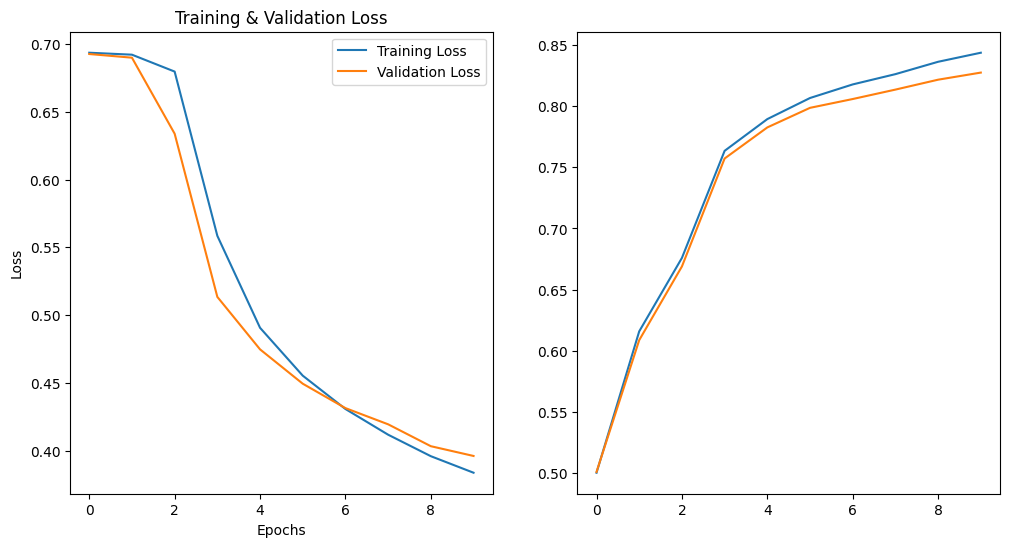

In [17]:
# embedding_dim 256
vocab_size = len(stoi) + 1
embedding_dim = 256
hidden_dim = 256
output_dim = 1
n_layers = 2
device = "cuda" if torch.cuda.is_available() else "cpu"

model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)
train(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-5, device=device)



In [18]:
# hidden_dim 512
vocab_size = len(stoi) + 1
embedding_dim = 256
hidden_dim = 512
output_dim = 1
n_layers = 2
device = "cuda" if torch.cuda.is_available() else "cpu"

model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)
train(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-5, device=device)



Epoch 1: Train Loss: 0.6923, Train Acc: 0.6246, Valid Loss: 0.6897, Valid Acc: 0.6255
Epoch 2: Train Loss: 0.6231, Train Acc: 0.7560, Valid Loss: 0.5132, Valid Acc: 0.7561
Epoch 3: Train Loss: 0.4861, Train Acc: 0.7909, Valid Loss: 0.4635, Valid Acc: 0.7884
Epoch 4: Train Loss: 0.4435, Train Acc: 0.8083, Valid Loss: 0.4403, Valid Acc: 0.8019
Epoch 5: Train Loss: 0.4134, Train Acc: 0.8271, Valid Loss: 0.4130, Valid Acc: 0.8149
Epoch 6: Train Loss: 0.3898, Train Acc: 0.8397, Valid Loss: 0.3953, Valid Acc: 0.8248
Epoch 7: Train Loss: 0.3711, Train Acc: 0.8487, Valid Loss: 0.3815, Valid Acc: 0.8334
Epoch 8: Train Loss: 0.3541, Train Acc: 0.8570, Valid Loss: 0.3696, Valid Acc: 0.8388


In [ ]:
# hidden_dim 512 and embedding_dim 512
vocab_size = len(stoi) + 1
embedding_dim = 512
hidden_dim = 512
output_dim = 1
n_layers = 2
device = "cuda" if torch.cuda.is_available() else "cpu"

model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)
train(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-5, device=device)



In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

## Part 4. Evaluation [10 pt]

**Important**. At this point in the assignment your test data should not have been evaluated by any of your models. The test data should be evaluated only after you have finished all the previous parts of the assignment. Once you evaluate your models on the test data you cannot change your models or else you may make hyperparameter adjustments that could lead to overfitting to the test data.

### Part (i) [3pt RESULT]

Report the final test accuracy of your model. Comment on how the result compares with accuracy obtained on the training and validation data. Are the results what you expected? Explain.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''


### Part (ii) [3pt DISCUSSION]

Look over the misclassified samples in the test data and see if you can find any patterns on where the model has difficulty with identifying the review sentiment. Provide up to 5 examples of positive and negative reviews each to support your findings.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''


### Part (iii) [2pt RESULT]

What is your model's prediction of the **probability** that
the review message provided below is a positive review?

Hint: You will need to apply the same processing on the review as was done on the the train, val, and test data sets.

In [ ]:
review = """ Man.... I wish I loved this movie more than I did. Don't get me wrong,
it's a solid action movie with jaw-dropping stunts (some of the best in the series),
but as a Mission: Impossible movie, it felt like a small step backward for the franchise.
Fallout had mind-blowing action sequences and stunt work, along with developing Ethan's
relationship with Ilsa, providing closure with Julia, showing the lengths Ethan would
go to protect those closest to him, and battling an imposing villain. Dead Reckoning:
Part One stretches the movie across two films only to seemingly showcase action
spectacle after action spectacle while sacrificing character development.
Characters I have grown to love over a decade of films felt sidelined, ignored,
or wasted. Hayley Atwell's new character chewed up most of the screen time, and
while she was fantastic, I wanted to see more of the original team. The new villain
had an inconsistent ability that confused more than intimidated. There were some
important emotional moments that I just didn't feel the weight of when I definitely
should have. Part Two might tie everything together and make me enjoy Part One
more in retrospect, but unfortunately, I left wanting more from this one. """



In [ ]:
# TO BE COMPLETED







### Part (iv) [2pt DISCUSSION]

Do you think that detecting positive and negative reviews is an easy or difficult task?

Since machine learning models are expensive to train and deploy, it is very
important to compare our models against baseline models: a simple
model that is easy to build and inexpensive to run that we can compare our
recurrent neural network model against.

Explain how you might build a simple baseline model. This baseline model
can be a simple neural network (with very few weights), a hand-written algorithm,
or any other strategy that is easy to build and test.

**Do not actually build a baseline model. Instead, provide instructions on
how to build it.**

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

# PART B - Transfer Learning

For many natural language processing tasks, it is generally not a good idea to train a very large deep neural network model from scratch due to enormous compute requirements and lack of sufficient amounts of training data. Instead, you should always try to take advantage of an existing model that performs similar tasks as the one you need to solve.

In this part of the assignment we will be using pretrained models to improve the performance on identifying positive and negative reviews. There are several pretrained models that are available to us, here we will use a pretrained BERT model that comes with the hugging face transformer library.

Provided below is sample code to get you started. For more details please visit the hugging face tutorial on using pretrained models using PyTorch: https://huggingface.co/docs/transformers/training

#### Sample Code

In [ ]:
# install relevant libraries
!pip install -qq transformers

In [ ]:
# load relevant libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

################### SUBMISSION NOTE ####################################
#  - output of this cell creates issues for converting ipynb to HTML
#  - you may want to delete this output when you are ready to submit

In [ ]:
sample_txt = 'I want to learn how to do sentiment analysis using BERT and tokenizer.'

encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
  truncation = True
)

In [ ]:
encoding['input_ids']

In [ ]:
encoding['attention_mask']

In [ ]:
hidden_states = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[0]
pooled_output = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[1]

In [ ]:
hidden_size = bert_model.config.hidden_size

print(hidden_size)
print(hidden_states.shape)
print(pooled_output.shape)


In the sample code provided we loaded a short text sequence, tokenized it using the same tokenization that was used in the pretrained BERT model, and fed the tokenized input into the BERT model to obtain the embeddings.

The model output consists of two forms of embeddings:
- **hidden_states** are the final layer of outputs that has a shape sequence_length x embeddings, much like the hidden states of a recurrent neural network
- **pooled_output** is the result of applying max pooling on the hidden states to effectively collapse the sequence dimenension and ensure the same output size for any given sequence before feeding into the classification stage

Note that you can preprocess all of the data prior to training a classifier stage for sentiment analysis to help speed up the training process. This is no different from the process we applied in an earlier assignment using AlexNet and image data.

## Part 1. Data Loading [5 pt]

We will be using the same "IMDB Movie Review Dataset" that we used earlier. Reload the data and complete Part B of the assignment. You should be able to complete part B independently from Part A.

### Part (i) [1pt EXPLORATORY]

Provided below is a DataLoader for your training and test datasets so you can iterate over batches of data. Run the DataLoader to create your training, validation, and test data.

In [ ]:
from torch.utils.data import Dataset, DataLoader

class MovieReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)

  def __getitem__(self, item):
    review = str(self.reviews[item])
    #obtain numerical labels
    target = 1 if self.targets[item] == 'positive' else 0

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
      truncation = True
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
# prepare data loaders
MAX_LEN = 400
BATCH_SIZE = 16

# load dataset
df = pd.read_csv("IMDB Dataset.csv")

# Convert 'sentiment' to numerical labels if it's not already numeric
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split the dataset into training, validation, and test sets
X = df[['review']]  # DataFrame of features
y = df['sentiment']  # Series of targets

# Splitting the data into training and temp sets (the latter will be further split into validation and test sets)
df_train, df_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Further split the temp set into validation and test sets
df_valid, df_test, y_valid, y_test = train_test_split(df_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Reset index
df_train.reset_index(drop=True, inplace=True)
df_valid.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

#training data
train_data = MovieReviewDataset(reviews=df_train['review'].to_numpy(),
                                targets=df_train['sentiment'].to_numpy(),
                                tokenizer=tokenizer,
                                max_len=MAX_LEN)

train_data_loader = DataLoader(train_data, batch_size = BATCH_SIZE, num_workers = 4) #modify num_works as needed

# Validation data
valid_data = MovieReviewDataset(reviews=df_valid['review'],
                                targets=df_valid['sentiment'],
                                tokenizer=tokenizer,
                                max_len=MAX_LEN)

valid_data_loader = DataLoader(valid_data, batch_size=BATCH_SIZE, num_workers=4)  # Adjust num_workers as per your setup

# Test data
test_data = MovieReviewDataset(reviews=df_test['review'],
                               targets=df_test['sentiment'],
                               tokenizer=tokenizer,
                               max_len=MAX_LEN)

test_data_loader = DataLoader(test_data, batch_size=BATCH_SIZE, num_workers=4)  # Adjust num_workers as per your setup


### Part (ii) [1pt EXPLORATORY]

Use the **train_data_loader** to load one sample. What are the different attributes provided with the sample and how are they used?

In [ ]:
# TO BE COMPLETED




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iii) [1pt EXPLORATORY]

Determine the range of values for the tokens in the training data. How are the tokens obtained?

Hint: You can apply your intuition here, or do some additional research to find how the "bert-base-cased" tokenization is done.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iv) [1pt EXPLORATORY]

Generate histograms of all the token values in the training data. Repeat for the validation and test data. What are the top 5 occuring tokens in the training_dataset? What do these tokens represent?

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (v) [1pt EXPLORATORY]

Select a single sample from your training DataLoader and feed it through the **bert_model** to obtain the hidden_states and pooled_output. Briefly describe what each tensor dimension represents and what affects the size of each dimension.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

## Part 2. Model Architecture [2 pt]

### Part (i) [1pt MODEL]

Prepare a review classifier model that builds on the pooled output from the Bert model to identify positive and negative reviews.

In [ ]:
class SentimentClassifierPooled(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifierPooled, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

    # TO BE COMPLETED

  def forward(self, input_ids, attention_mask):
    pooled_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)[1]

    # TO BE COMPLETED



### Part (ii) [1pt MODEL]

Construct the architecture for a review classifier model that uses the last hidden output from the Bert model to identify positive and negative reviews.

In [ ]:
class SentimentClassifierLast(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifierLast, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

    # TO BE COMPLETED

  def forward(self, input_ids, attention_mask):

    # TO BE COMPLETED


## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

In [ ]:
def get_accuracy(model, data):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """

    # TO BE COMPLETED



### Part (ii) [1pt MODEL]

Write a function **train_model** to train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

In [ ]:
# TO BE COMPLETED




### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters. You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

## Part 4. Evaluation [10 pt]

### Part (i) [3pt RESULT]

Report the final test accuracy of your best BERT-based model. Then summarize in a pandas dataframe the accuracy obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.



In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (ii) [2pt RESULT]

Report the false positive rate and false negative rate of your model across the test set. Then summarize in a pandas dataframe the false postive and false negative rate of your model obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.

In [ ]:
# TO BE COMPLETED




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iii) [3pt DISCUSSION]
Examine some of the misclassified reviews from you best BERT and LSTM models to better identify the differences in the models. Try to provide some justification for any differences in the misclassifications observed in the models.

Is there any part of the review that you could modify to make the classifications correct? Try to make small changes to the review to see if you can make the model make the correct classification while keeping the review as close to the original as possible.

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Part (iv) [2pt DISCUSSION]
Find 5 samples of positive and negative reviews on IMDB that were posted recently and evaluate them with your best BERT and LSTM models from parts A and B. How well do they perform?

In [ ]:
# TO BE COMPLETED





In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to take on a challenging task.

In part A we constructed and trained an LSTM model to identify the sentiment in movie reviews. In Part B we used the embeddings of a BERT model pretrained on a large corpus of text to demonstrate how transfer learning can be used to improve our movie sentiment model. The BERT model is one of many language models that we could have used to implement transfer learning.

For this bonus challenge you are asked to implement a generative character-level LSTM model to produce IMDB movie reviews. Once the model is sufficiently trained you can then use its hidden states as the embedding for training a movie sentiment model. Construct your new movie sentiment analysis model and compare the performance against the model from part A and B.

There are many variants of a generative LSTM model that you can consider. As a starting point you can use the generative LSTM sample code provided in the lecture notes. Specifically, the one used to generate Shakeaspeare. More advanced versions of a generative LSTM can be found in the Universal Language Model Fine-turing for Text Classification (ULMfit) paper (https://arxiv.org/abs/1801.06146).

Tasks:

1. Create a generative character-level LSTM model trained to create IMDB reviews
2. Create a classifier using the embeddings from the generative LSTM model (from step 1) to identify positive and negative reviews.
3. Compare the performance of the model with the results in parts A and B of the assignment.
4. Upgrade the generative LSTM model using the techniques listed in the ULMfit paper (e.g., bi-directional LSTM, pretraining with wikipedia text and fine-tuning on IMDBT reviews, etc.).

Bonus marks will be provided based on the number of steps completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.


In [ ]:
# TO BE COMPLETED




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
#!pip install nbconvert

%%shell
jupyter nbconvert --to html /content/A4.ipynb


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **10 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**